# Import modelflow

In [1]:
from modelclass import model
model.widescreen()

# Load model and data, and run 

In [2]:
masia,baseline = model.modelload('asia.pcim',run=1,silent=1)

# Make experiment with Cambodia

In [3]:
altdf = baseline.copy()
altdf.loc[2021:2021,'KHM_GCARBR_A'] = altdf.loc[2021:2021,'KHM_GCARBR_A'] + 20  
for exovar in 'KHM_PREM KHM_EXPE KHM_EXPH KHM_EXPSP KHM_OGC KHM_OGI'.split():
        altdf.loc[2021:2050,exovar+'_D'] = 1
        altdf.loc[2021:2050,exovar+'_X'] = altdf.loc[2021:2050,exovar]
        

altres = masia(altdf,2021,2050,silent=1,first_test = 4,ljit=0)

# Display the impact

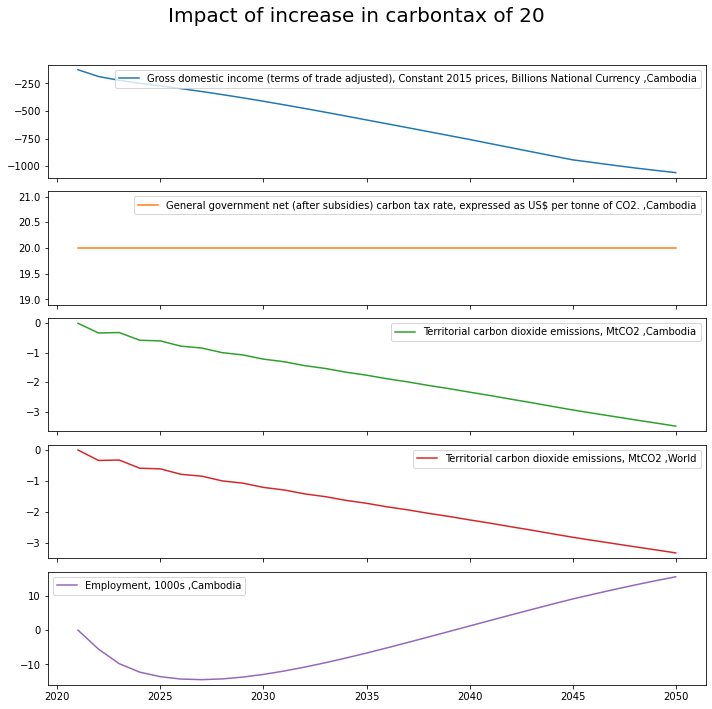

In [4]:
masia['KHM_GDI KHM_GCARBR KHM_CO2 WLD_CO2 KHM_LNN'].dif.rename().plot(colrow=1,sharey=0,title='Impact of increase in carbontax of 20');

# Define the same esperiment for several countries.
This is just an example, will be wrapped in function later

In [5]:
countries = 'KHM IDN MYS'.split()
altdf = baseline.copy()
for country in countries:
    altdf.loc[2021:2021,country+'_GCARBR_A'] = altdf.loc[2021:2021,country+'_GCARBR_A'] + 20  
    for exovar in 'PREM EXPE EXPH EXPSP OGC OGI'.split():
            altdf.loc[2021:2050,country+'_'+exovar+'_D'] = 1
            altdf.loc[2021:2050,country+'_'+exovar+'_X'] = altdf.loc[2021:2050,country+'_'+exovar]
        

altres = masia(altdf,2021,2050,silent=1,first_test = 4,ljit=0)

outvar = 'GDI GCARBR CO2 LNN'.split()
displayvar = ' '.join(country+'_'+var for country in countries for var in outvar)+' WLD_CO2'

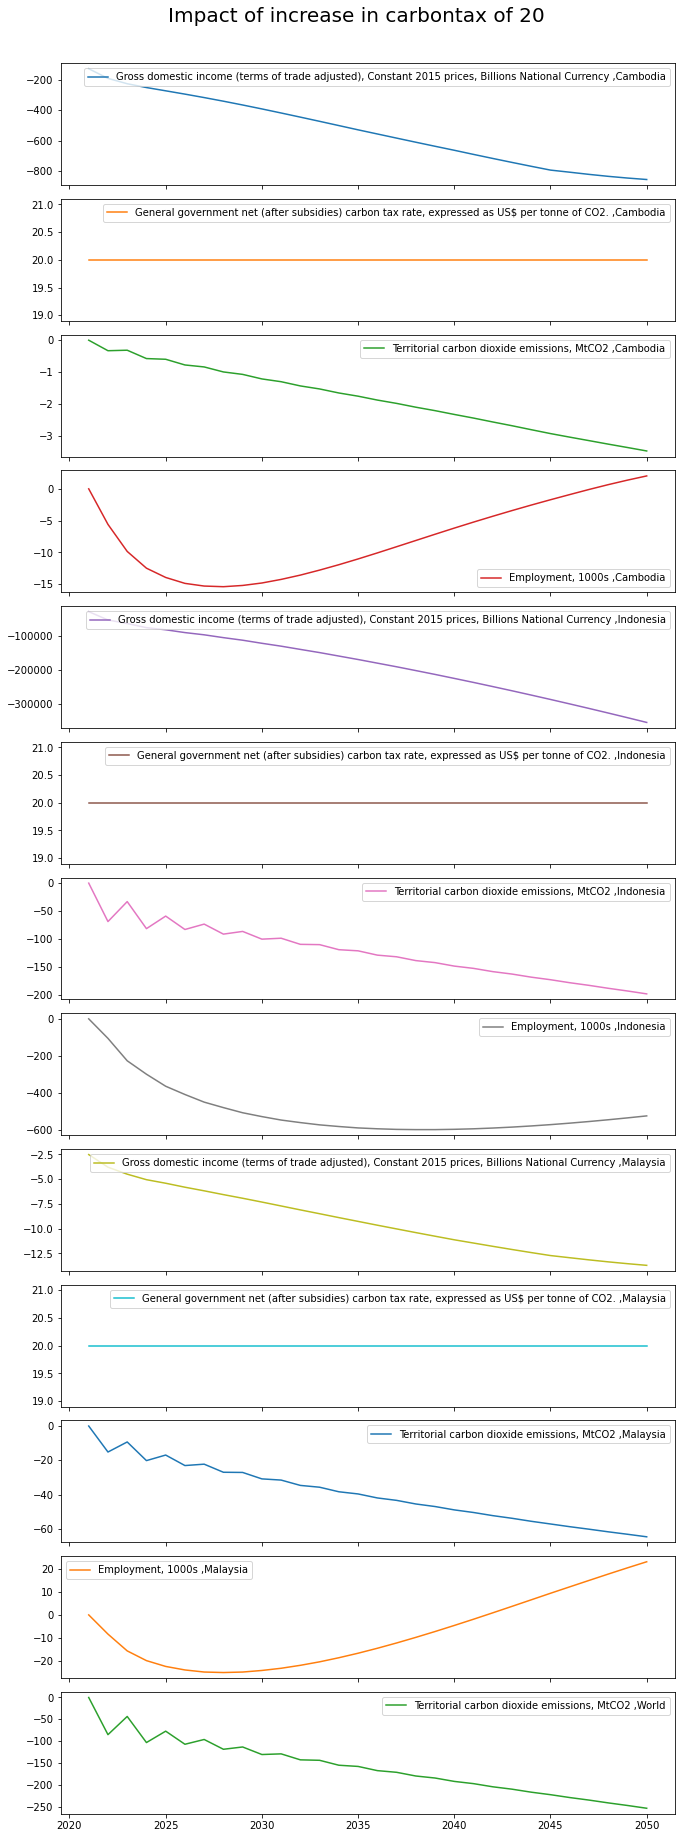

In [6]:
masia[displayvar].dif.rename().plot(colrow=1,sharey=0,top=0.95,title='Impact of increase in carbontax of 20');

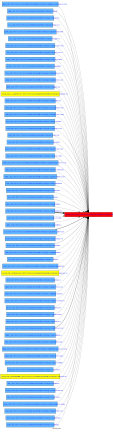

In [7]:
masia.WLD_CO2.tracepre(up=1,HR=0)

In [43]:
masia.GBR_CO2.tracepre(HR=0,up=2,pdf=1)  

In [12]:
experiments = {country : country+'_GCARBR_A' for country in countries}
experiments

{'KHM': 'KHM_GCARBR_A', 'IDN': 'IDN_GCARBR_A', 'MYS': 'MYS_GCARBR_A'}

In [14]:
from modeldekom import totdif

In [15]:
xx = totdif(masia,summaryvar=displayvar,experiments = experiments)


Total dekomp took       :        25.8 Seconds


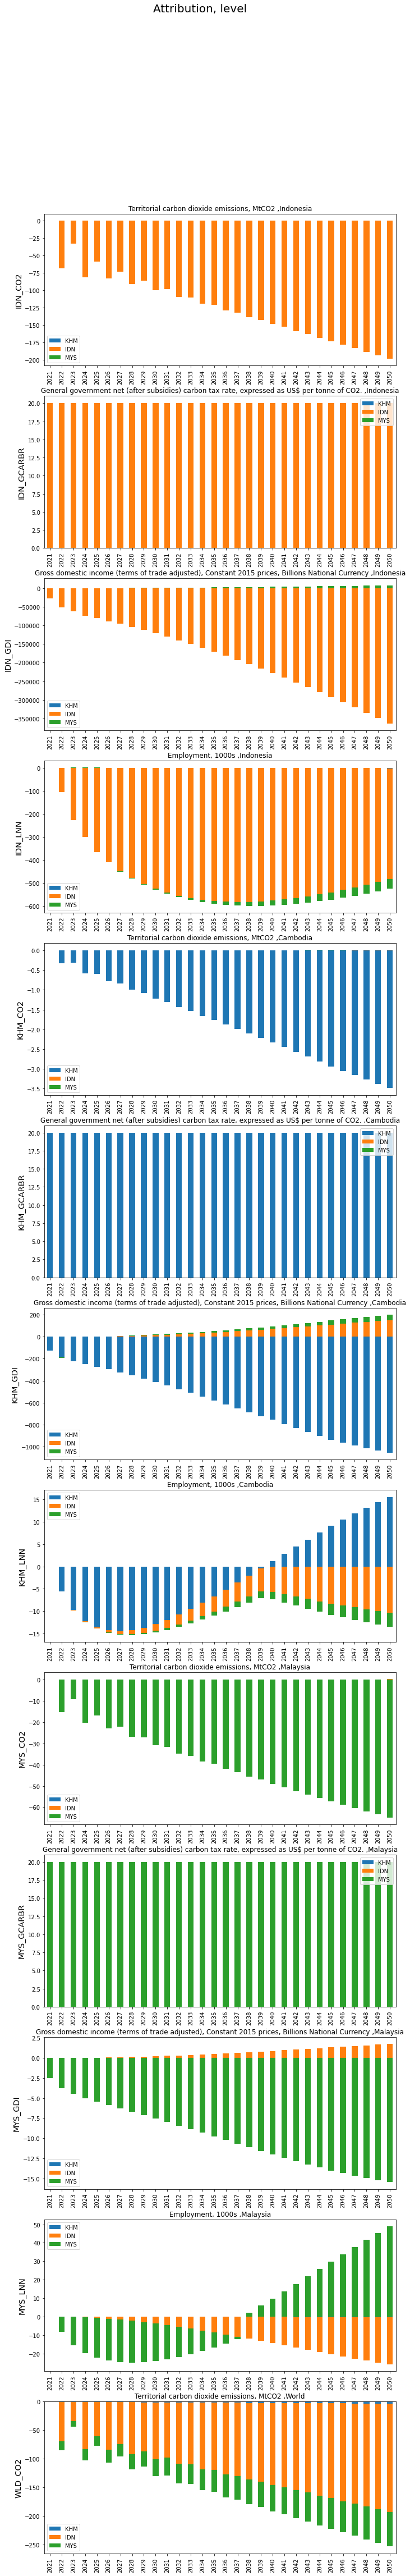

In [32]:
xx.desdic = masia.var_description
fig = xx.explain_all(displayvar);

In [33]:
fig.savefig('experiment.pdf')